# Import du Dataset

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


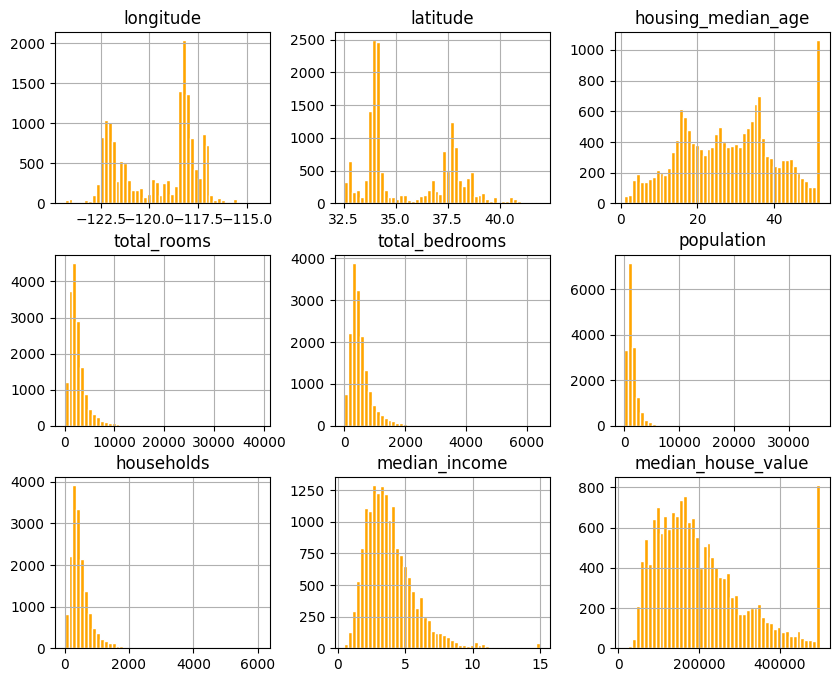

In [4]:
df.drop('Unnamed: 0', axis=1).hist(bins=50, figsize=(10, 8), ec='w',  color='Orange')
plt.show()

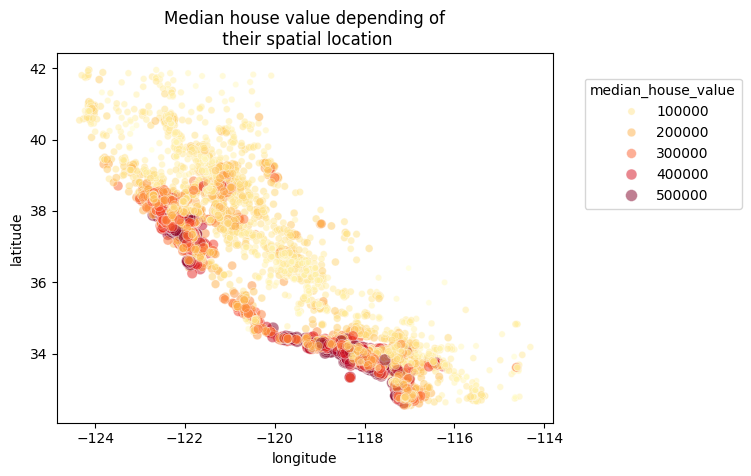

In [5]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    size="median_house_value",
    hue="median_house_value",
    palette="YlOrRd",
    alpha=0.5,
)
plt.legend(title="median_house_value", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [6]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat = df.latitude, lon = df.longitude, hover_name = df['Unnamed: 0'], zoom = 3, height = 300, color=df.median_house_value, size=df.population,
                  color_continuous_scale=px.colors.sequential.YlOrRd)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity']) 
  
df[['ocean_proximity']]

,ocean_proximity
0,1
1,0
2,1
3,0
4,1
...,...
16507,1
16508,3
16509,1
16510,0


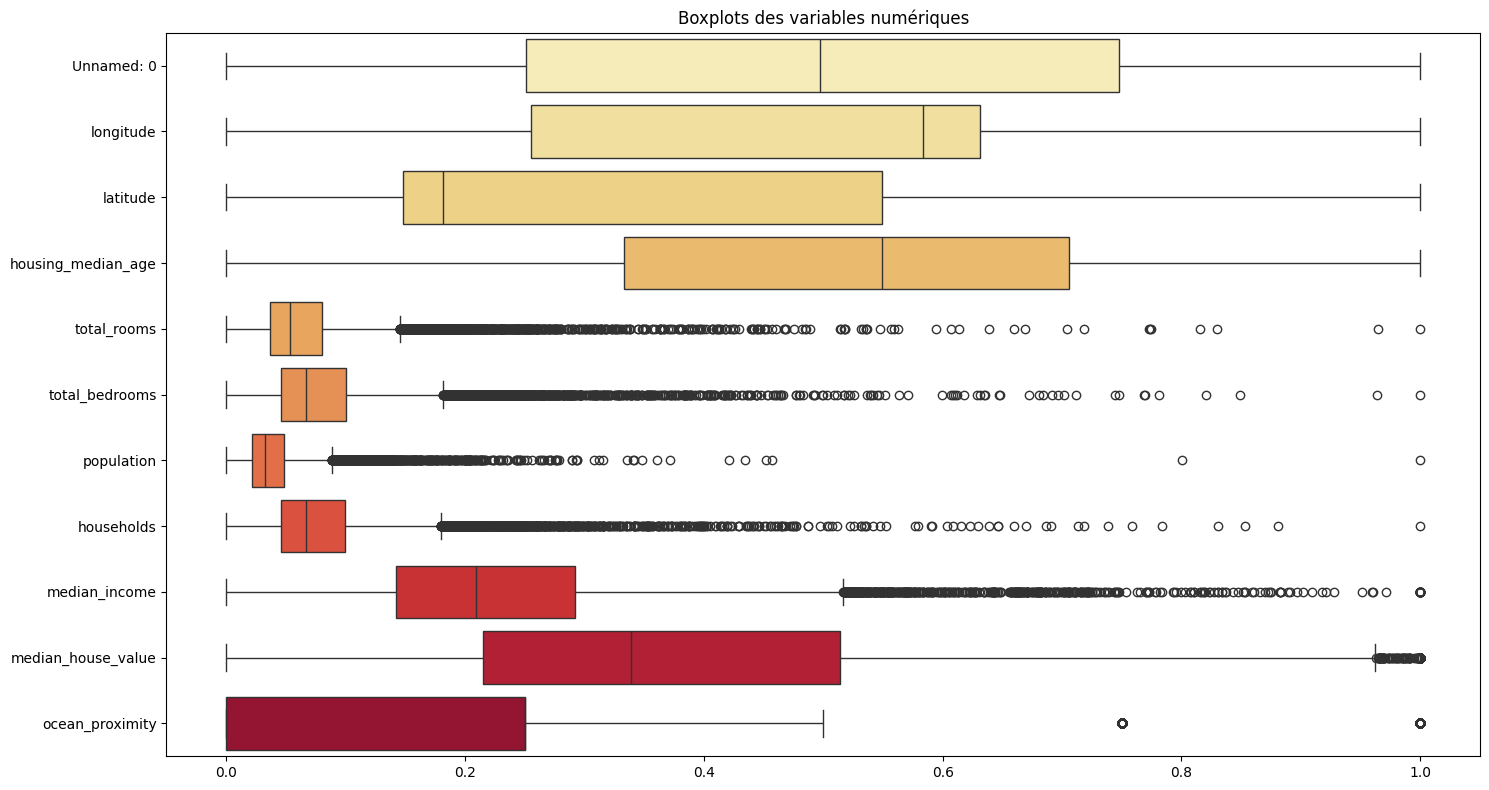

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

df_stand = df.copy()
features = list(df.columns)
scaler = MinMaxScaler()
df_stand[features] = scaler.fit_transform(df_stand[features])
df_stand

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_stand, orient='h', palette='YlOrRd')
plt.title('Boxplots des variables numériques')
plt.tight_layout()
plt.show()

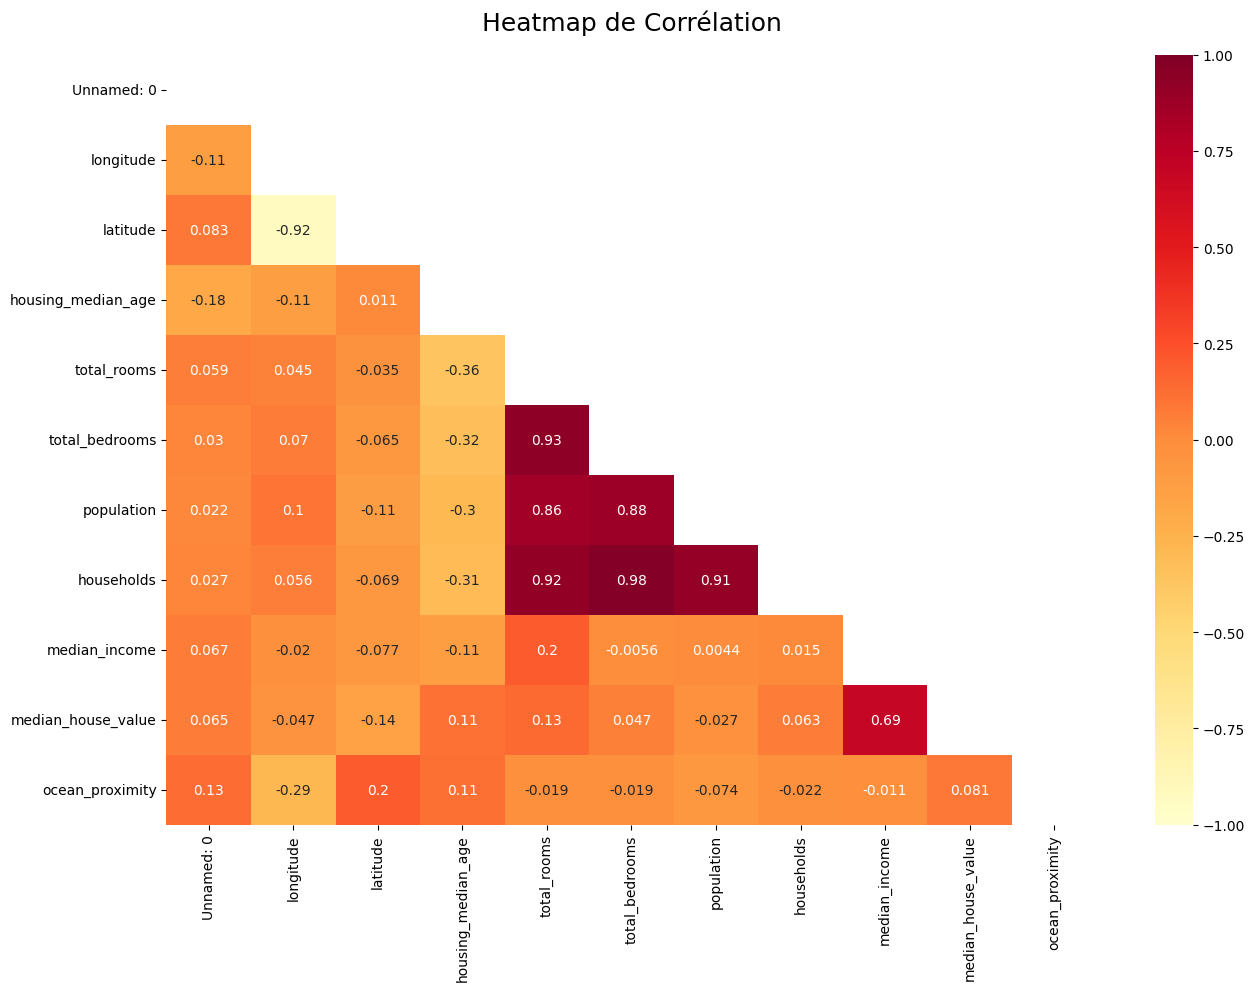

In [9]:
import numpy as np

plt.figure(figsize=(15, 10))
matrix = np.triu(df.corr())

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=matrix, cmap="YlOrRd")
heatmap.set_title('Heatmap de Corrélation', fontdict={'fontsize':18}, pad=18);

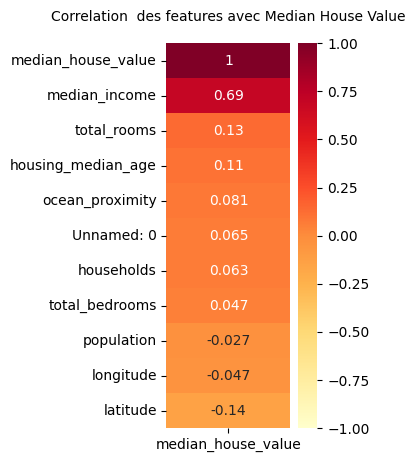

In [10]:
plt.figure(figsize=(2, 5))
heatmap = sns.heatmap(df.corr()[['median_house_value']].sort_values(by='median_house_value', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap="YlOrRd")
heatmap.set_title('Correlation  des features avec Median House Value', fontdict={'fontsize':10}, pad=16);